### Computer Exercise 05 - Logistic Regression
#### Name: Alexandyr Card
#### G-Number: G01275535

 Most of the code needed for this exercise is included below.  However, there are some choices that need to be made in how some of the calls to classes are done, and some expansion of the code is necessary.  For example, you are given the basic code for creating pair-plots, but you may want to make more than one.

### Common Imports ###

In [1]:
#Common imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from pandas.plotting import table
from sklearn.metrics import *
np.random.seed(42)

### Read Dataset ###

In [2]:
# NOTE 1 = Diabetes
# 0 = Not Diabetes
diabetesDF = pd.read_csv('diabetes.csv')
print(diabetesDF.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
diabetesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
for i in list(diabetesDF.columns):
    print(diabetesDF[str(i)].value_counts())
# Blood pressure, SkinThickness, Insulin, BMI have large # of 0's should impute values

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: BloodPressure, dtype: int64
0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
29     17
40     16
25     16
26 

### Splitting the data set ###
### Extract feature vectors and target outputs into two numpy arrays ###
#### Combined these two steps

In [5]:
# Disagree with the way the data are split. Reading the documentation of the dataset on Kaggle
# it doesn't say the data are shuffled. I worry there is underlying pattern to way data are 
# entered so we need to shuffle the values when splitting.
# https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

# This was the old way the professor had us split the data
# N1 = 600 #Put in a value here
# DF_train = diabetesDF[:N1]
# DF_test = diabetesDF[N1:]

# X_train = np.asarray(DF_train.drop('Outcome',1))
# y_train = np.asarray(DF_train['Outcome'])
# X_test = np.asarray(DF_test.drop('Outcome',1))
# y_test = np.asarray(DF_test['Outcome'])

# diabetesDF.columns

df_features, df_outcomes = diabetesDF.iloc[:, :len(diabetesDF.columns)-1].to_numpy(), diabetesDF['Outcome'].to_numpy().reshape(-1, 1)

In [6]:
N1 = 600
X_train, X_test, y_train, y_test = train_test_split(df_features, df_outcomes, train_size = N1/df_features.shape[0], random_state = 42)

### Data Scaling ###

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler_min_max=MinMaxScaler()
scaler_standard=StandardScaler()

In [8]:
diabetesDF.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


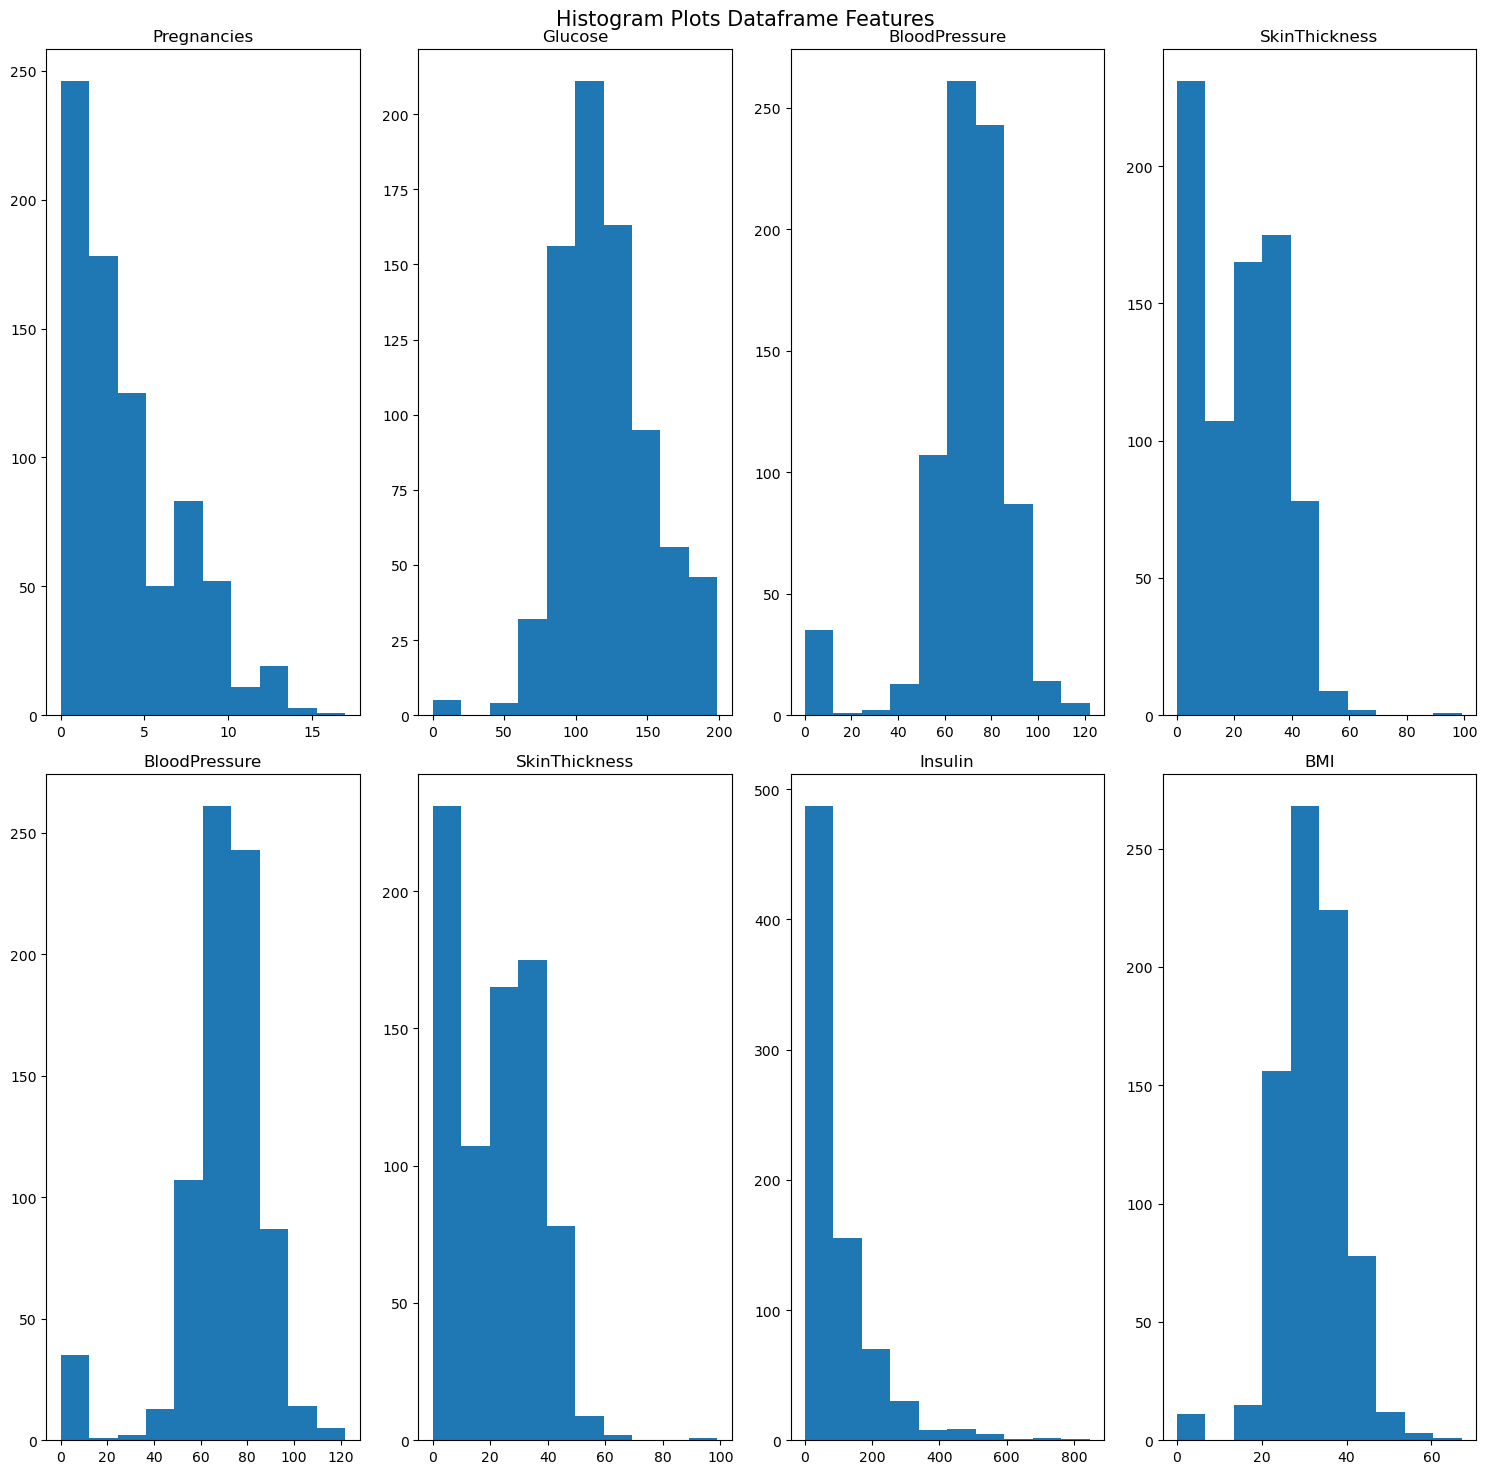

In [9]:
# Looking at the histogram plots below the data seem to have a 
# Guassian like shape which leads me to believe we should use 
# standard scaling. In addition, "standardization is much less
# affected by outliers" (Geron p. 69) and looking at the 
# dataframe summary statistics there are outliers in the data.
# Finally, 'the motivation to [scale features to lie within a range] 
# include robustness to very small standard deviations of features 
# and preserving zero entries in sparse data' (SciKit Learn Documentation);
# however, these data are neither sparse nor have small standard deviation

fig, axs = plt.subplots(2, 4, figsize = (15,15))
fig.suptitle("Histogram Plots Dataframe Features", fontsize = 15)
for row in range(2):
    for col in range(4):
        var = str(diabetesDF.columns[row*2 + col])
        ax = axs[row,col]
        ax.set_title(var)
        ax.hist(diabetesDF[var])
plt.tight_layout()
fig.savefig("histogram_plots_features.jpg")
plt.show()

### Scaling the training set

In [10]:
X_train_min_max = scaler_min_max.fit_transform(X_train)
X_train_standard = scaler_standard.fit_transform(X_train)
X_test_standard = scaler_standard.transform(X_test)

Box plot of the unscaled training set.

In [11]:
def boxplot_fig(data, type_title, type_save):
    plt.boxplot(data, manage_ticks=False)
    plt.yscale("symlog")
    plt.xlabel("Feature index")
    plt.ylabel("Feature magnitude")
    plt.title(f"Boxplot {type_title} Data")
    plt.tight_layout()
    plt.savefig(f"boxplot_{type_save}_data.jpg")
    plt.show()

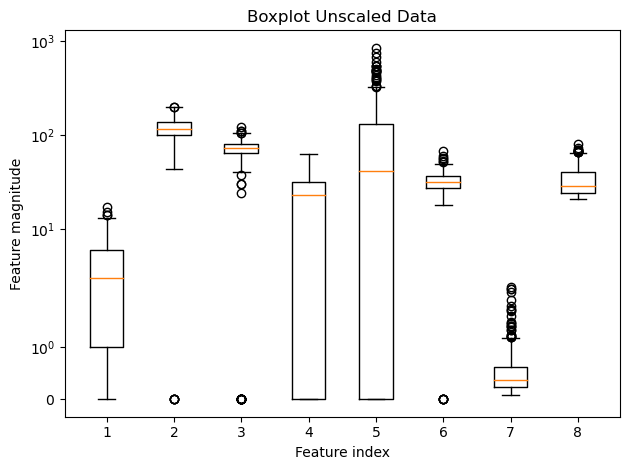

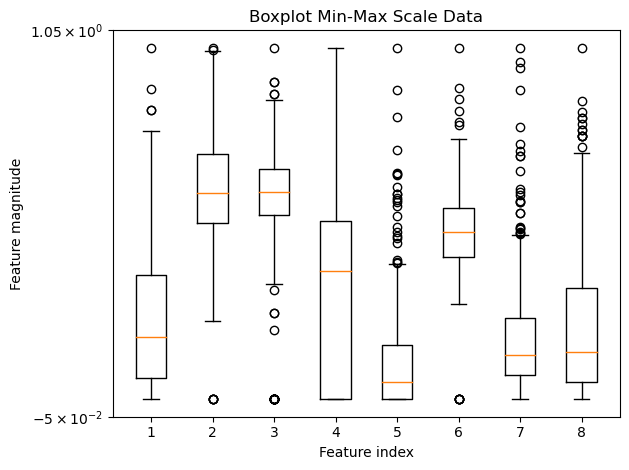

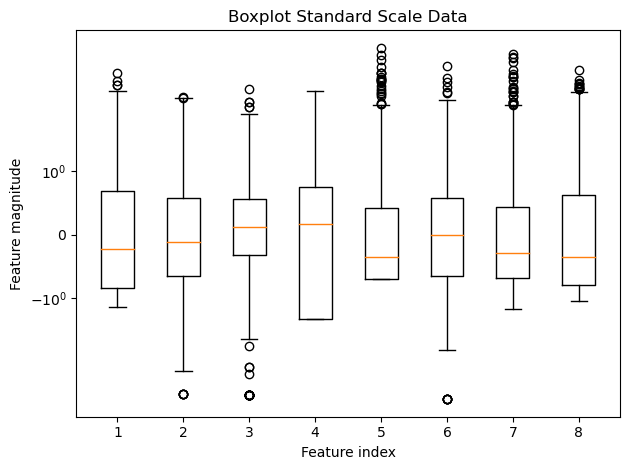

In [12]:
# As discussed above, there are many outliers in the data which can
# affect min-max scaling because this methodology will squash all
# other values. This is seen in the number of flier points.

# To scale the data, we first split the dataset into train-test examples. 
# Then we find the scaling parameters using the training feature vector. 
# Once we have the scaling parameters, we use them to scale both the training
# and test datasets, "[a]s with all the transformations, it is important to
# fit the scalers to the training data only, not the full dataset (including 
# the test set). Only then can you use them to transform the training set and
# the test set (and the new data)." (Geron, p.70). This corresponds the first method. 
# One reason we do this is to avoid data leakage (information from outside the 
# training set is used in model creation) in model construction.

boxplot_fig(X_train, "Unscaled", "unscaled")
boxplot_fig(X_train_min_max, "Min-Max Scale", "min_max")
boxplot_fig(X_train_standard, "Standard Scale", "standard")

## Data Exploration ##

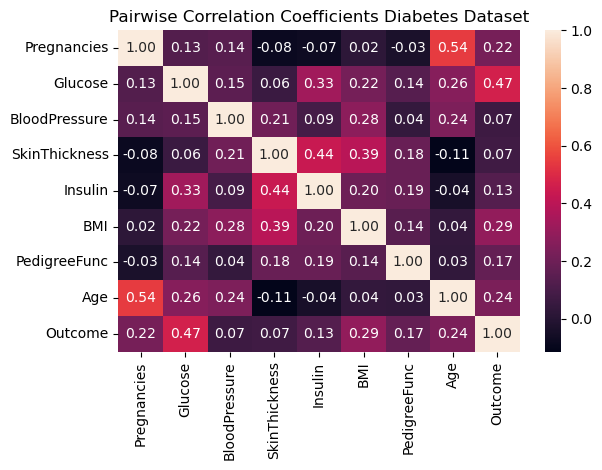

In [13]:
corr = diabetesDF.corr()
labels = [i  if i != "DiabetesPedigreeFunction" else "PedigreeFunc" for i in diabetesDF.columns]
ax = sns.heatmap(corr, xticklabels=labels, yticklabels=labels, annot=True, fmt='.2f')
ax.set_title("Pairwise Correlation Coefficients Diabetes Dataset")
plt.tight_layout()
plt.savefig("pairwise_corr_diabetes.jpg")
plt.show()

### Experiments p.6
The pairs of features with the largest correlations are (Age, Pregnancies) 0.54, (Glucose, Outcome) 0.47, (Insulin, SkinThickness) 0.44, and (BMI, SkinThickness) 0.39.
The features most correlated with Outcome are Glucose, BMI, Pregnancies, and Age.

### Experiment @ p.7
I used the four variables which are most correlated with the outcome variable to create the pairplots. I also wanted to see the correlation between the variables to understand if there would be a multicollinearity issue.
One thing I notice is that pregnancies 

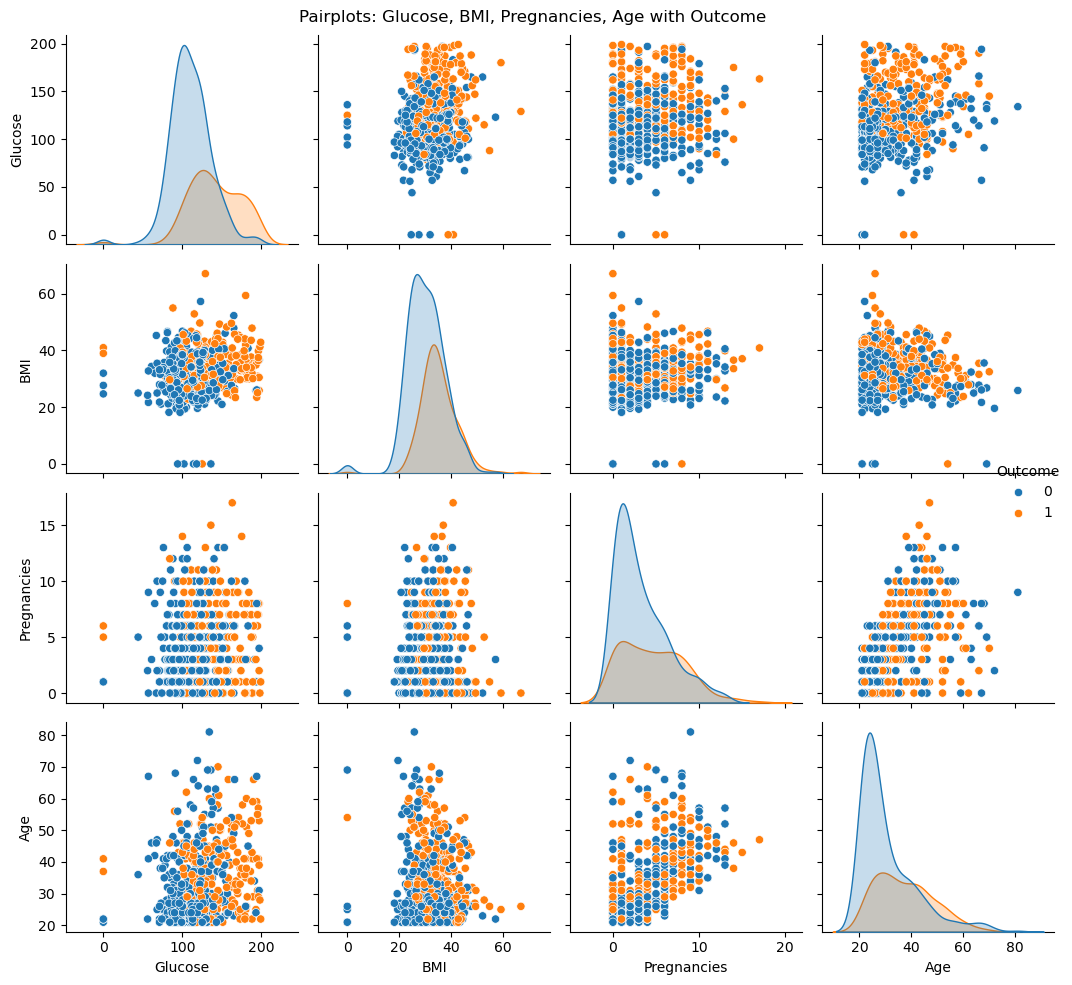

In [14]:
train_plot_x = pd.DataFrame(X_train, columns = labels[:len(labels)-1])
train_plot_y = pd.DataFrame(y_train, columns = [labels[len(labels)-1]])
train_concat_df = pd.concat([train_plot_x,train_plot_y],axis=1)

g = sns.pairplot(train_concat_df, vars=["Glucose", 'BMI', "Pregnancies", 'Age'], hue='Outcome')
plt.suptitle("Pairplots: Glucose, BMI, Pregnancies, Age with Outcome")
plt.tight_layout()
plt.savefig("pairplots_training_diabetes.jpg")
plt.show()  

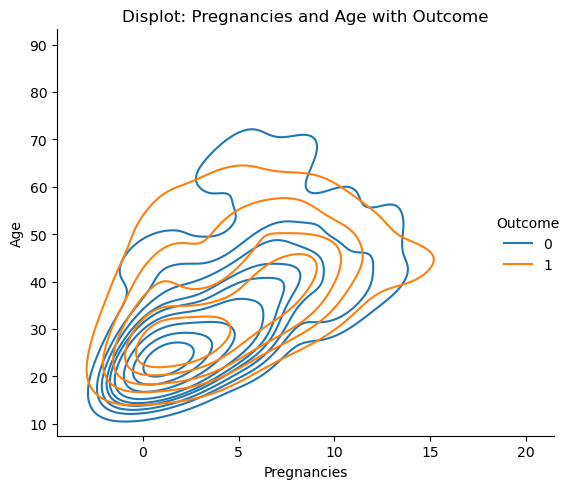

In [15]:
g = sns.displot(data=train_concat_df, x='Pregnancies',y='Age',hue="Outcome", kind='kde')
plt.title("Displot: Pregnancies and Age with Outcome")
plt.tight_layout()
plt.savefig("kde_dispplot_preg_age.jpg")
plt.show()

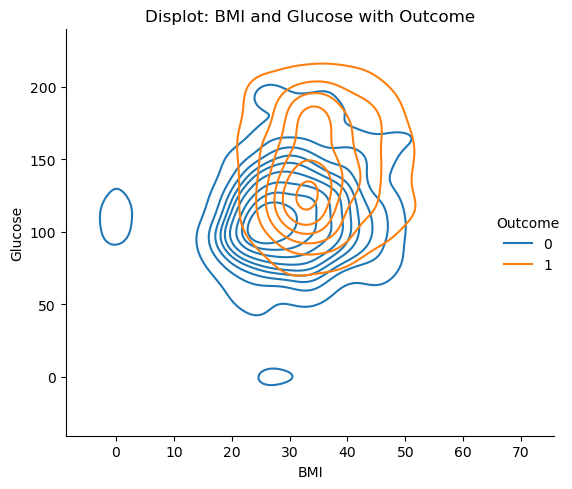

In [16]:
g = sns.displot(data=train_concat_df, x='BMI',y='Glucose',hue="Outcome", kind='kde')
plt.title("Displot: BMI and Glucose with Outcome")
plt.tight_layout()
plt.savefig("kde_dispplot_glucose_bmi.jpg")
plt.show()

## Logistic Regression

In [17]:
uniq, cnts = np.unique(y_train, return_counts = True)
print(uniq, cnts)
balance = cnts / sum(cnts)
print(balance)

[0 1] [392 208]
[0.65333333 0.34666667]


In [18]:
# Using the scaled datasets because the default solver lbfgs suffers on poorly scaled data
# Using class_weight = 'balanced' b/c the dataset is unbalanced
# 0: 65.3%, 1: 34.7%
clf=LogisticRegression(class_weight = 'balanced')
clf.fit(X_train_standard, y_train.ravel())

LogisticRegression(class_weight='balanced')

In [19]:
y_test_pred = clf.predict(X_test_standard)

In [20]:
accuracy = clf.score(X_test_standard, y_test)
print("accuracy = ", accuracy * 100, "%")

accuracy =  71.42857142857143 %


In [21]:
y_test_prob = clf.predict_proba(X_test_standard)
print(len(y_test_prob))

168


20


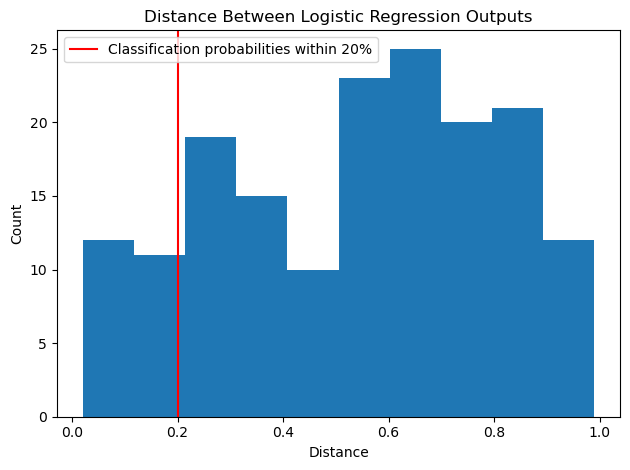

In [22]:
new_np = []
not_high = 0
for i in y_test_prob:
    c1, c2 = i
    dist = round(abs(c1-c2),2)
    new_np.append(dist)
    if dist < 0.2:
        not_high += 1
print(not_high)
plt.hist(new_np)
plt.title("Distance Between Logistic Regression Outputs")
plt.xlabel("Distance")
plt.ylabel("Count")
plt.axvline(x = 0.2, color = 'r', label = "Classification probabilities within 20%")
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.savefig("logit_reg_dist_hist.jpg")
plt.show()

#### Experiment p.9
b. The accuracy of the classifier on the test set is 73.2%.

c. Shown in the histogram below is the distance between the logistic regression output probabilities. Essentially, this is the probability of class 1 minus probability of class 0 to show the distance between the two outputs. I believe anything greater than 0.15 (i.e. one class is at least 65% likely) would give us confidence to classify an output as one class or the other. The number of observations which fall within the 0.15 threshold is 18 which is approximately 11 percent. 

d. The accuracy of the model is 73 percent and 11 percent of the observations have a probability of 65 percent or less. This makes me think the classifier is not doing a great job classifying the samples as having or not having diabetes. 

## Performance:  Accuracy, Confusion Matrix, Precision and Recall ##

#### Experiment @ p.9
1. The confusion matrix is shown below. As discussed above, the accuracy of the classifier is 73% (this can also be found dividing the sum of the main diagonal by the matrix count) it also does a poor job on both false positives and false negatives. The false negative (predicted not diabetes) rate is 27% and the false positive (predicted diabetes) rate is also 27%. I had hoped adding class weights would reduce the false negative rate because predicting a patient does not have diabetes when they do carries large risk; however, this classifier does a poor job in that area too.
2. Confusion matrix rows are the true label, therefore, the sum of the row is the total number of true observations belonging to a class. The columns are the predicted labels. therefore, the sum of the column is the total number of predicted observations belonging to a class. The sum of matrix C is the total number of observations in the dataset provided.
3. My matrix is not close to being symmetric, the off diagonals are 16 and 29. If a confusion matrix is close to symmetric, and the off diagonals are close to zero, this is desrable because it shows the classifier is not making many errors.

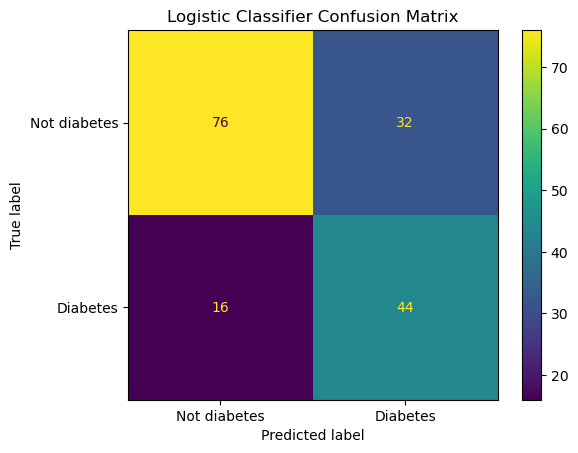

In [23]:
cm = confusion_matrix(y_test, y_test_pred)
diab_labels = ["Not diabetes", "Diabetes"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = diab_labels)
disp.plot()
disp.ax_.set_title("Logistic Classifier Confusion Matrix")
plt.savefig("log_class_cm.jpg")

In [24]:
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred) 
f1 = f1_score(y_test,y_test_pred)
print(f"The precision is {precision}")
print(f"The recall is {recall}")
print(f"The F1 score is {f1}")

The precision is 0.5789473684210527
The recall is 0.7333333333333333
The F1 score is 0.6470588235294118


#### Assignment p.10
1. The precision is 60%, the recall is 73%, and the F1 score is 66%.
2. In light of the results above, the classifier is terrible. It has low scores across the board.

#### Classification Report @ pp. 10-11

In [25]:
print(np.unique(y_test, return_counts=True))
print(np.unique(y_test_pred, return_counts=True))

class_report_dict = classification_report(y_test,y_test_pred, target_names = ["Not Diabetes", "Diabetes"], output_dict = True)
class_report_df = pd.DataFrame(class_report_dict).transpose()
class_report_df.to_csv("class_report.csv")
print(classification_report(y_test,y_test_pred, target_names = ["Not Diabetes", "Diabetes"]))

(array([0, 1]), array([108,  60]))
(array([0, 1]), array([92, 76]))
              precision    recall  f1-score   support

Not Diabetes       0.83      0.70      0.76       108
    Diabetes       0.58      0.73      0.65        60

    accuracy                           0.71       168
   macro avg       0.70      0.72      0.70       168
weighted avg       0.74      0.71      0.72       168



### ROC ###

#### Assignment @ p.12
1. ROC plot shown below.
2. The threshold is zero at the ladt point on the graph at (1,1)
3. I believe increasing the threshold from 0 is advisable. At 0, the model is simply assigning positive to every observation which makes the output of the model useless. Looking at the ROC curve, increasing the threshold would allow us to keep the true positive rate high but reduce the number of false positives because many of the final threshold values have a greater marginal increase of the false positive than the true positive.
4. The diagonal dashed line is the random chance line. This depicts a model choosing a class based on random chance (50-50 probability).

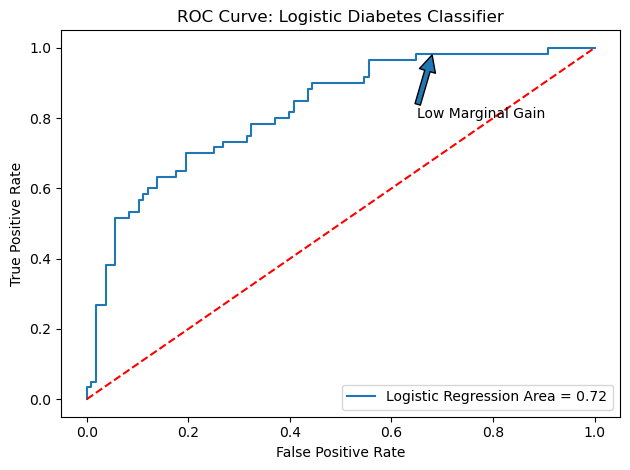

In [26]:

roc_score = roc_auc_score(y_test,clf.predict(X_test_standard))
fpr, tpr, thr = roc_curve(y_test, clf.predict_proba(X_test_standard)[:,1])
plt.figure()
plt.plot(fpr,tpr, label='Logistic Regression Area = {:.2f}'.format(roc_score))
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Logistic Diabetes Classifier')
plt.annotate('Low Marginal Gain',xy=(0.68,0.98),xytext=(0.65,0.8),arrowprops={})
plt.legend(loc = 'lower right')

plt.tight_layout()
plt.savefig("roc_cruve_logit_diabetes.jpg")
plt.show()

### Feature Importance ###

In [27]:
labels = list(diabetesDF.columns)[:-1]
coeff = list(clf.coef_[0])


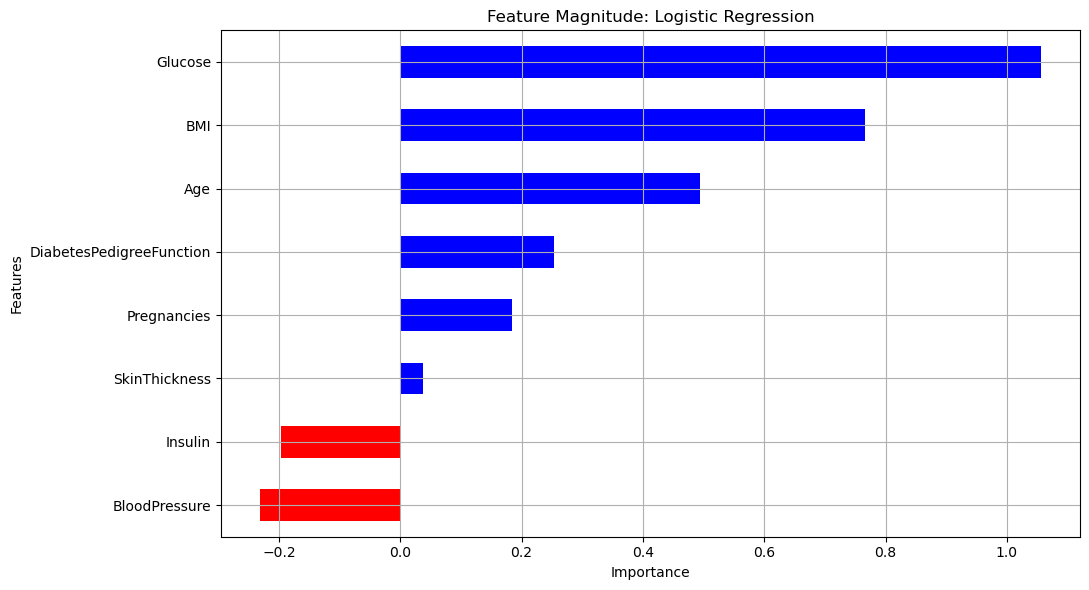

In [28]:
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6), \
                         color = features.positive.map({True: 'blue', False: 'red'}), grid=True)
plt.xlabel('Importance')
plt.title("Feature Magnitude: Logistic Regression")
plt.tight_layout()
plt.savefig("feature_mag_log_regr.jpg")
plt.show()

#### Experiment @ p.13 
1. N/A
2. The features that have the most significant influence on the model are Glucose, BMI and Age. DiabetesPedigreeFucntion and BloodPressure have roughly equal influence on the model albeit in the opposite direction. This makes sense because the correlations of these 3 variables is highest so it is expected they'd have the largest magnitude.
3. Insulin and BloodPressure have a negative effect on diabetes. This means that a high level of insulin or blood pressure decreases the chances of having diabetes.
4. Blood pressure is not as important as age because the magnitude of age is greater than 0.4 and the magnitude of blood pressure is greater than 0.2.

#### Section 8 Assignment a

In [29]:
# The probability you have diabetes is 0.32
print(diabetesDF.columns)
test_sample = np.array([0,130,125,30,100, 32, 1.1, 25]).reshape(1, -1)
test_sample_transform = scaler_standard.transform(test_sample)
print(clf.classes_)
print(clf.predict_proba(test_sample_transform))

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
[0 1]
[[0.67898819 0.32101181]]


#### Section 8 Assignment b and c

In [40]:
def plotter(feature, label):
    arr1 = np.asarray(diabetesDF[feature]).reshape(-1,1)
    label1 = np.asarray(diabetesDF['Outcome'])
    LR1 = LogisticRegression()
    LR1.fit(arr1, label1)
    # print(LR1.coef_[0])
    m = max(arr1)[0]
    x = np.arange(0, m, m/10).reshape(-1,1)
    y = LR1.predict_proba(x)
    plt.scatter(x,y[:,1])
    plt.plot(x,y[:,1])
    plt.xlabel(label)
    plt.ylabel("Probability of Diabetes")
    plt.title(f"Predicting Diabetes from {label}")
    plt.savefig(f"predict_diabetes_{label}.jpg")
    plt.show()

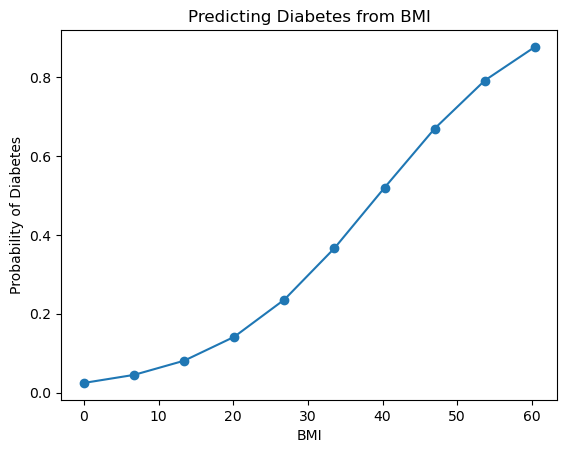

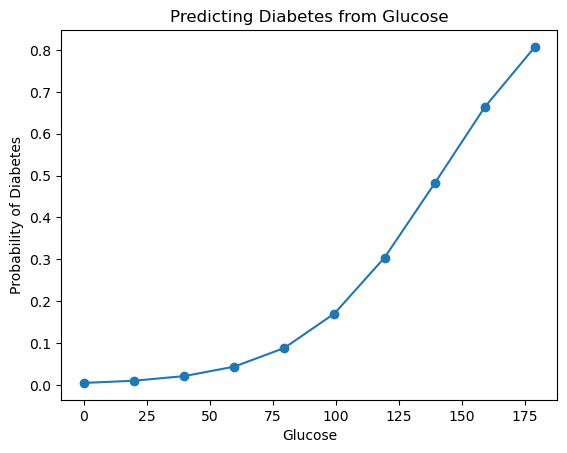

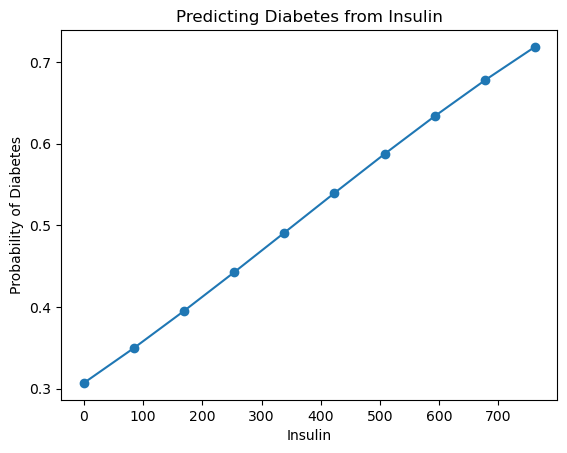

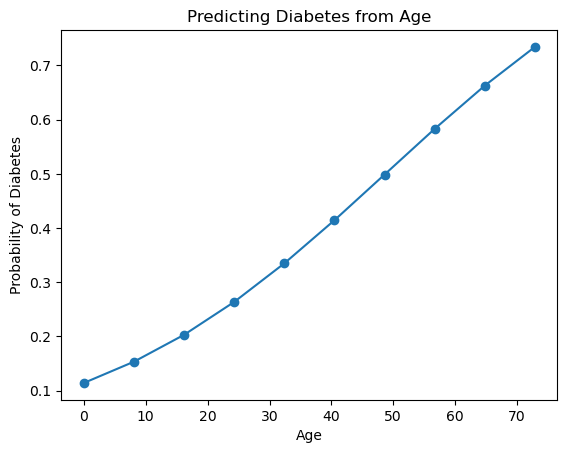

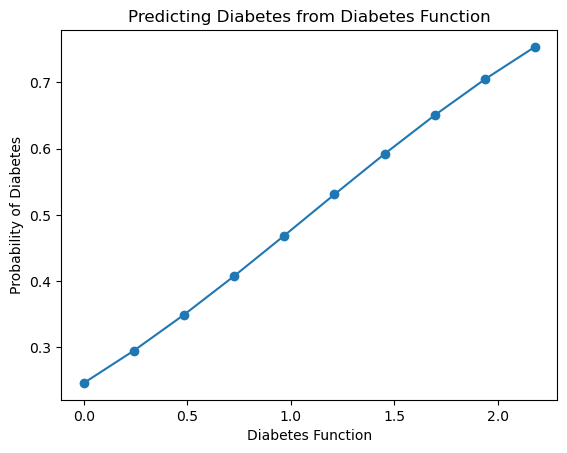

In [41]:
plotter("BMI", "BMI")
plotter("Glucose", "Glucose")
plotter("Insulin", "Insulin")
plotter("Age", "Age")
plotter("DiabetesPedigreeFunction", "Diabetes Function")

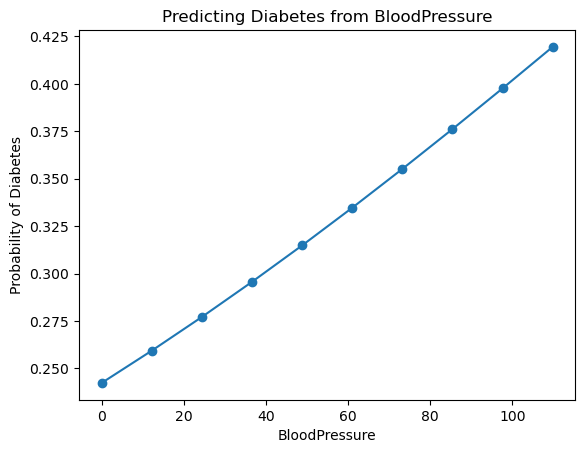

In [42]:
plotter("BloodPressure","BloodPressure")

In [32]:
def glucose_age(min_age, max_age):
    array1 = np.asarray(diabetesDF[(diabetesDF["Age"] >= min_age) & (diabetesDF["Age"] < max_age)]["Glucose"]).reshape(-1,1)
    label1 = np.asarray(diabetesDF[(diabetesDF["Age"] >= min_age) & (diabetesDF["Age"] < max_age)]["Outcome"])
    
    LR_AGE = LogisticRegression()
    LR_AGE.fit(array1, label1)
    
    mn = array1.min(axis=0)[0]
    mx = array1.max(axis=0)[0]
    
    x = np.arange(mn, mx, (mx-mn)/10).reshape(-1,1)
    y = LR_AGE.predict_proba(x)
    plt.scatter(x,y[:,1])
    plt.plot(x,y[:,1])
    plt.xlabel("Glucose")
    plt.ylabel("Probability of Diabetes")
    plt.title(f"Predicting Diabetes from Glucose for Ages {min_age} - {max_age-1}")
    plt.tight_layout()
    plt.savefig(f"glucose_for_age_{min_age}_{max_age}.jpg")
    plt.show()

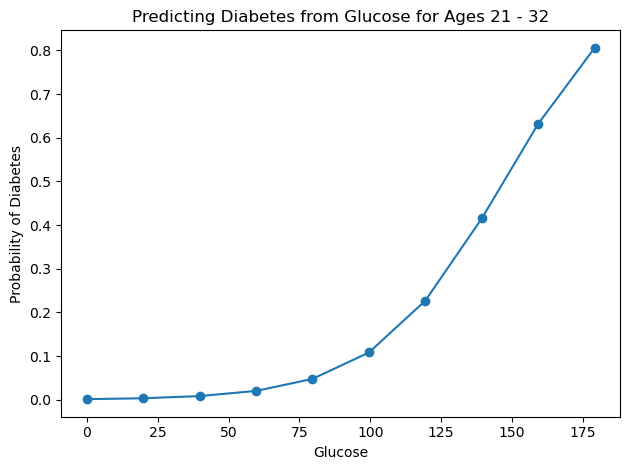

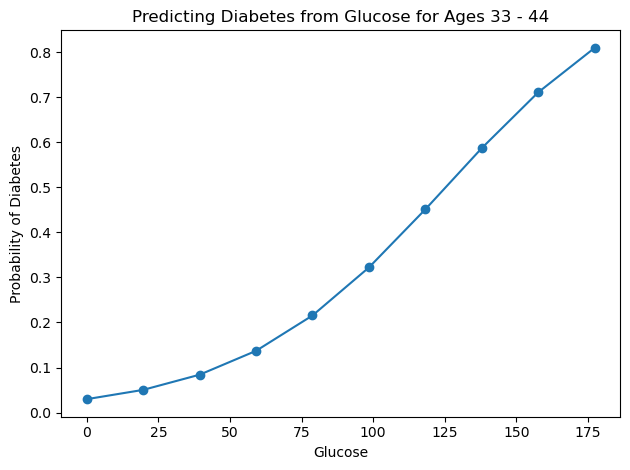

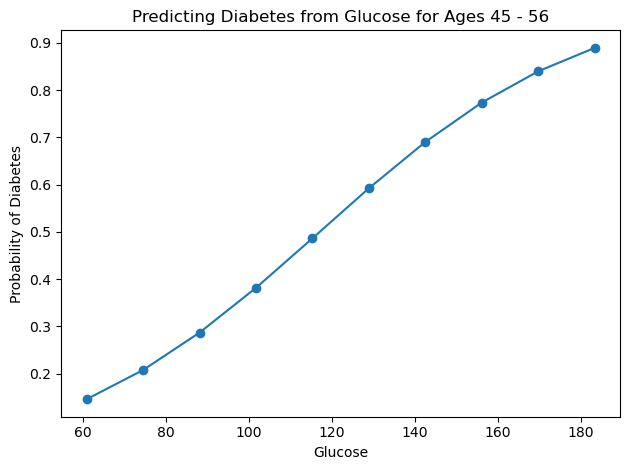

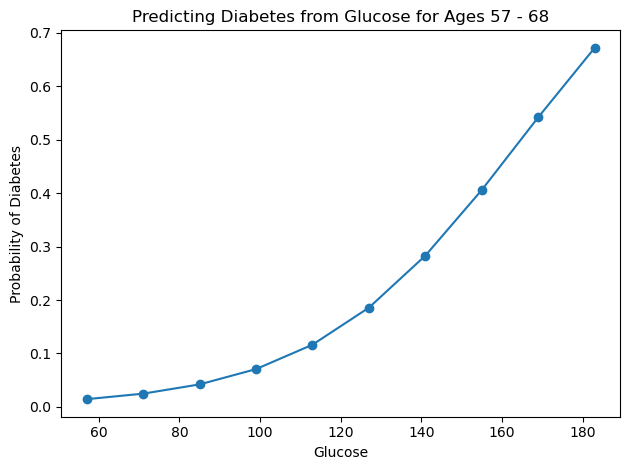

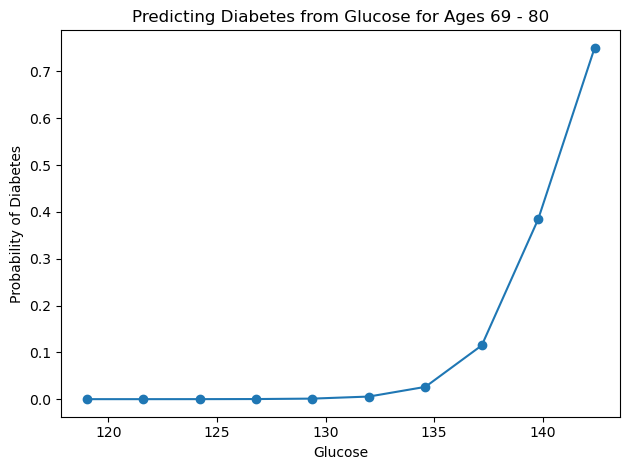

In [33]:
min_age = diabetesDF["Age"].min()
max_age = diabetesDF["Age"].max()

jump = (max_age-min_age)//5
# 75 - 81 doesn't appear in the dataset
for i in range(min_age, max_age+1-jump, jump):
    glucose_age(i, i+jump)